![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Regressão generalizada

O modelo de regressão pode ser generalizado para encontrar os coeficientes de $n$ funções $f_i$
para aproximar, o melhor possível, os valores $y_j$ observados em $m$ pontos $t_j$.

## Questão 1: Calculando a regressão

Abaixo, dê uma função que calcula a matriz do sistema linear e, em seguida,
a que usa esta matriz para calcular os parâmetros do modelo -
neste caso, os coeficientes multiplicando cada uma das $f_i$'s.

In [2]:
# a = np.arange(10)
# a

In [3]:
# flist = [np.exp,np.sin]
# model_M(a,flist)

In [4]:
def model_M(ts,fs):
    """
    Constrói a matriz M = [[f1(t1), f2(t1), ...],
                           [f1(t2), f2(t2), ...],
                           [f1(t3), f2(t3), ...],
                           ...
                          ] (array)
    correspondente ao sistema  y_j = \sum a_i f_i(t_j)
    """
    result = np.zeros((len(ts),len(fs)))   
    for j,f in enumerate(fs):
        result[:,j] = f(ts)
    return result

def model_par(ts,ys,fs):
    """
    Calcula os coeficientes  a_i  que minimizam o erro quadrático do sistema  y_j = \sum a_i f_i(t_j)
    """
    A = model_M(ts,fs)
    coefs, *_ = np.linalg.lstsq(A,ys,rcond=None)
    return coefs

In [5]:
def make_sin(n):
    def f(x):
        return np.sin(n*x)
    return f

def make_cos(n):
    def f(x):
        return np.cos(n*x)
    return f

In [6]:
fs = [make_sin(2), make_cos(3), make_cos(4)]
ts = np.arange(10)
M = model_M(ts, fs)
n, m = np.shape(M)
assert n == len(ts)
assert m == len(fs)

In [7]:
fs = [np.exp, np.log, np.tan, np.sin]
ts = np.arange(4,20)
M = model_M(ts, fs)

assert M[3,1] == np.log(7)
assert M[6,2] == np.tan(10)

In [8]:
np.random.seed(1)
ys = np.random.randn(16)
coefs = model_par(ts, ys, fs)
assert len(coefs) == len(fs)

In [9]:
coefs = model_par(ts, ys, fs)
assert np.isclose(coefs[0], 0)
assert np.abs(coefs[3] + 0.5) < 0.1

# Regressão com erro de observação

Uma das grandes vantagens da regressão é poder "limpar" os erros de observação.
Mas, é claro, isso só é possível quando temos "bem mais" observações do que funções na base.

Nesta parte, veremos como isso acontece para uma função curiosa:

In [10]:
def func(x):
    return 2**np.sin(2*x) - np.exp(np.cos(3*x))

Agora, vamos construir nossos "dados de ajuste" (com erros):

In [11]:
a = 0
b = 2*np.pi

N = 19
xs = np.linspace(a,b,N)
ys = func(xs)
np.random.seed(2)
errs = np.random.normal(scale=0.5,size=N)
ys += errs

## Questão 2: Explorando os dados

Faça um gráfico tanto da função `func` como dos dados,
no intervalo considerado.

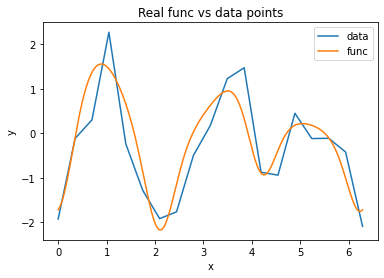

In [12]:
plt.plot(xs,ys,label="data")
xs_2 = np.linspace(a,b,1000)
ys_2 = func(xs_2)
plt.plot(xs_2,ys_2,label="func")
plt.title("Real func vs data points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
ax = plt.gca()

In [13]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [14]:
for l in ax.lines:
    xgraph = l.get_xdata()
    assert min(xgraph) == 0
    assert max(xgraph) == 2*np.pi

In [15]:
ax = None

## Questão 3: Interpolando e observando

Agora, calcule o ajuste "interpolador" destes dados, com senos e cossenos,
e faça um gráfico com a função original, os dados e a função interpoladora.

Lembre-se: para interpolar os dados, é necessário ter o mesmo número de funções na base
do que pontos para interpolar.

Dica: use as funções `make_sin` e `make_cos` para criar uma lista de funções `fs`.

In [16]:
def interpol(x,fs,coefs):
    a = np.array([coef*f(x) for f,coef in zip(fs,coefs)])
    return np.sum(a,axis=0)

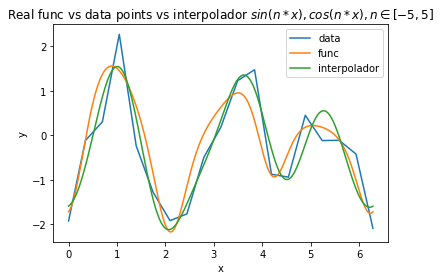

In [17]:
fs = [make_sin(x) for x in np.arange(-4,5)]
fs.pop(4)
fs.extend([make_cos(x) for x in np.arange(-5,6)])
# xs_3 = np.linspace(a,b,len(fs)+1)
# ys_3 = func(ts)
coefs = model_par(xs, ys, fs)
plt.plot(xs,ys,label="data")
xs_2 = np.linspace(a,b,1000)
ys_2 = func(xs_2)
plt.plot(xs_2,ys_2,label="func")
ys_interpol = interpol(xs_2,fs,coefs)
plt.plot(xs_2,ys_interpol,label="interpolador")
plt.title("Real func vs data points vs interpolador $ sin(n*x),cos(n*x), n \in [-5,5]$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
ax = plt.gca()

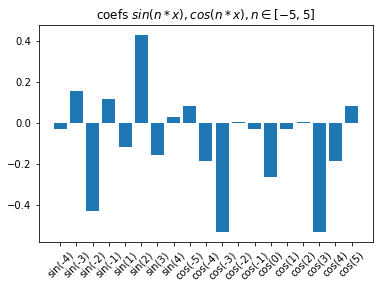

In [18]:
xticks_ = [f"sin({x})" for x in np.arange(-4,5)]
xticks_.pop(4)
xticks_.extend([f"cos({x})" for x in np.arange(-5,6)])
plt.bar(np.arange(len(coefs)),coefs)
plt.xticks(np.arange(len(xticks_)),labels=xticks_,rotation=45)
plt.title("coefs $ sin(n*x),cos(n*x), n \in [-5,5]$")
ax = plt.gca()

In [19]:
len(fs)

19

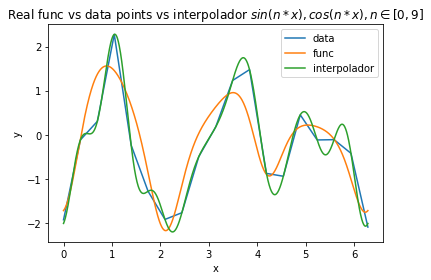

In [20]:
fs = [make_sin(x) for x in np.arange(0,10)]
fs.pop(0)
fs.extend([make_cos(x) for x in np.arange(0,10)])
# xs_3 = np.linspace(a,b,len(fs)+1)
# ys_3 = func(ts)
coefs = model_par(xs, ys, fs)
plt.plot(xs,ys,label="data")
xs_2 = np.linspace(a,b,1000)
ys_2 = func(xs_2)
plt.plot(xs_2,ys_2,label="func")
ys_interpol = interpol(xs_2,fs,coefs)
plt.plot(xs_2,ys_interpol,label="interpolador")
plt.title("Real func vs data points vs interpolador $ sin(n*x),cos(n*x), n \in [0,9]$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
ax = plt.gca()
# ax = plt.gca()

In [21]:
len(fs)

19

In [22]:
xs

array([0.        , 0.34906585, 0.6981317 , 1.04719755, 1.3962634 ,
       1.74532925, 2.0943951 , 2.44346095, 2.7925268 , 3.14159265,
       3.4906585 , 3.83972435, 4.1887902 , 4.53785606, 4.88692191,
       5.23598776, 5.58505361, 5.93411946, 6.28318531])

In [23]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3

for l in ax.lines:
    xgraph = l.get_xdata()
    assert min(xgraph) == 0
    assert max(xgraph) == 2*np.pi

O que você observa neste gráfico?

Aqui dois conjuntos de funções de base foram testadas: Uma na qual o valor de "n" das bases sin(n*x) e cos(n*x) eram simétricos no intervalo [-5,5] e outro no intervalo [0,9]. Com bases potencialmente diferentes, verificamos diferenças na solução encontrada. A primeira base, com valores de n simétricos, induz uma matriz cujo posto é menor do que a quantidade de bases. Isso porque cos(x) = cos(-x) e sen(x) = -sen(-x), ou seja, SÃO LINEARMENTE DEPENDENTES. Isso resulta numa curva interpoladora com menor grau de liberdade para se ajustar sobre os pontos. Já o segundo caso, garantimos que cada função da base é independente entre si. Isso faz com que a função interpoladora tenha mais liberdade para se ajustar sobre os dados, se aproximando mais deles. Essa diferença fica clara quando $x \in [4.5,6]$. No caso em que temos uma base L.D., a função possui um único máximo local, que se situa entre os pontos de máximo dos dados de fitting. Já no caso L.I., temos que a função interpoladora possui dois máximos locais nesse intervalo, indicando sua maior flexibilidade para se ajustar, e provavelmente gerar mais overffiting. O sen(0) = 0 foi retirado de ambas as bases, dado que ele não acrescenta nada.  

In [24]:
ax = None

In [25]:
xticks_ = [f"sin({x})" for x in np.arange(1,10)]
xticks_.extend([f"cos({x})" for x in np.arange(0,10)])

Faça, agora, um gráfico do valor absoluto ("amplitude") dos coeficientes de cada função.

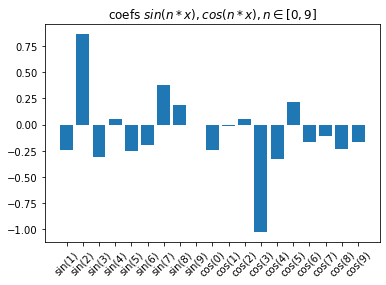

In [26]:
plt.bar(np.arange(len(coefs)),coefs)
plt.xticks(np.arange(len(xticks_)),labels=xticks_,rotation=45)
plt.title("coefs $ sin(n*x),cos(n*x), n \in [0,9]$")
ax = plt.gca()

O que você percebe?

<ul>
<li>Quando fazemos o n variar entre [-5,5]
    <p>
Percebe-se uma certa simetria nos valores dos coeficientes. No caso do seno, os coeficientes possuem mesmo valor em módulo mas sinais opostos, além disso as componentes sin(-2) e sin(2) foram as principais da parte da base de funções seno. No caso do cosseno, observamos uma simetria em relação a cos(0): os coeficientes possuem mesmo valor em módulo e sinal. Isso se dá pelo fato de que a função cosseno é par, isto é cos(x) = cos(-x), enquanto o seno é ímpar, sin(x) = -sin(-x). Em cos(0) observamos que temos uma componente constante e negativa, responsável por transladar a função para baixo. As principais componentes do cosseno são cos(-3) e cos(3).
<li>Quando fazemos o n variar entre [0,9]
    <p>
Percebe-se que nesse caso não temos simetria dos coeficientes. Aqui as principais componentes são sen(2) e cos(3). 

Quais as funções que correspondem às maiores amplitudes?

<ul>
<li>Quando fazemos o n variar entre [-5,5]
<p>
As maiores amplitudes são as do sen(+/- 2) e cos(+/- 3)
<li>Quando fazemos o n variar entre [0,9]
    <p>
As maiores amplitudes são as de seb(2) e cos(3)

## Questão 4: Coeficientes principais

Agora que vimos que algumas funções parecem mais importantes do que outras,
selecione apenas as que correspondem aos 3 maiores coeficientes,
e **recalcule** o ajuste, usando apenas estas três.
Você terá uma regressão, já que temos menos funções na base do que pontos ("dados").

In [27]:
n = 3
idx = np.argpartition(np.abs(coefs), -n)[-n:]
indices = idx[np.argsort((-np.abs(coefs))[idx])]
print(indices)
fs_3 = [fs[i] for i in indices]
coefs_3 = model_par(xs, ys, fs_3)
    
def F3(x):
    return interpol(x,fs_3,coefs_3)
        

[12  1  6]


In [28]:
F3(0)

-1.124317067868372

In [29]:
assert np.isclose(F3(0), -1.1243170678683723)

In [30]:
F3(np.pi/2)

-0.3767970517351514

In [31]:
assert np.isclose(F3(np.pi/2), -0.37679705173515127)

Faça o gráfico da função correspondente aos 3 maiores coeficientes da interpolação,
e compare com a função original `func` e sua interpolação.

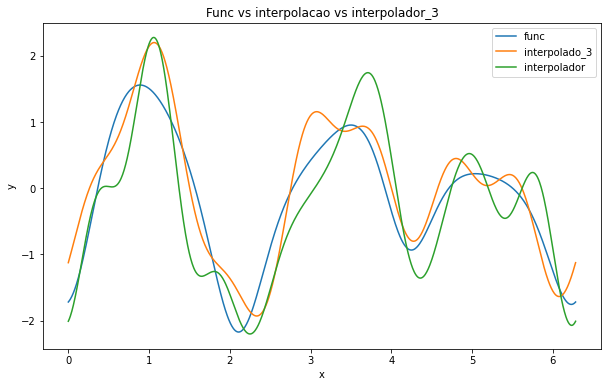

In [32]:
plt.figure(figsize=(10,6))
xs_2 = np.linspace(a,b,1000)
ys_2 = func(xs_2)
plt.plot(xs_2,ys_2,label="func")
ys_2 = F3(xs_2)
plt.plot(xs_2,ys_2,label="interpolado_3")
ys_interpol = interpol(xs_2,fs,coefs)
plt.plot(xs_2,ys_interpol,label="interpolador")
plt.title("Func vs interpolacao vs interpolador_3")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
ax=plt.gca()

In [33]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3

In [34]:
ax = None

Qual ajuste parece melhor?  Porquê?

O interpolador com 3 componentes parece melhor ajustado. A adição de mais componentes aumenta a liberdade que a função tem, fazendo com que ela tende a se aproximar mais dos pontos utilizados para o fitting. Como temos poucos pontos, uma base menor parece ter melhor capacidade de generalizar. De fato, o interpolador com 3 funções de base parece estar mais alinhado com os pontos de máximo e mínimo da função original.

## Questão 5: Erros

Para observar como o erro evolui ao incluirmos mais pontos,
vamos recalcular o ajuste para todos os valores de $n$, de 1 a 19,
e observar o erro quadrático médio no intervalo (refinado!).

Ao recalcular, escolha as funções em ordem decrescente
do valor absoluto do coeficiente encontrado pela interpolação.

Para auxiliar, construa a função `best_reg(fs,xs,ys,n)`,
que retorna a função dada pela regressão usando as $n$ funções com os maiores coeficientes.
(Para evitar variáveis globais, você pode primeiro calcular a interpolação,
para descobrir os maiores coeficientes, e daí escolher as funções para a regressão
e calcular de novo)

In [35]:
def best_reg(fs, xs, ys, n):
    """Melhor regressor a partir da base `fs`, baseado nos $n$ maiores coeficientes da interpolação."""
    coefs = model_par(xs, ys, fs)
    idx = np.argpartition(np.abs(coefs), -n)[-n:]
    indices = idx[np.argsort((-np.abs(coefs))[idx])]
    fs_n = [fs[i] for i in indices]
    coefs_n = model_par(xs, ys, fs_n)
    def interpol_x(x):
        a = np.array([coef*f(x) for f,coef in zip(fs_n,coefs_n)])
        return np.sum(a,axis=0)
    return interpol_x

In [36]:
F1 = best_reg(fs, xs, ys, n=1)
assert np.abs(F1(2) + 1) < 0.1

In [37]:
F10 = best_reg(fs, xs, ys, n=10)
assert F10(1) > 2

In [38]:
F2 = best_reg(fs, xs, ys, n=2)
assert np.isclose(F2(2), -1.732407192511482)

In [39]:
def midpoint(f,a,b,n=100):
    ts,h = np.linspace(a,b,n, endpoint=False, retstep=True)
    mids = ts+h/2
    return np.sum(f(mids)) * h

def regress_err_quad(ftrue, fs,xs,ys,n, a,b,num_div=100):
    """Calcula o erro quadrático médio, no intervalo [a,b], entre
    `ftrue` e a regressão dos dados (xs,ys) nas n melhors funções da base `fs`."""
    F = best_reg(fs,xs,ys,n)
    def err(x):
        return (ftrue(x) - F(x))**2
    return midpoint(err,a,b,n=num_div)

Agora, faça o gráfico do erro quadrático médio,
em função do número de funções na base.

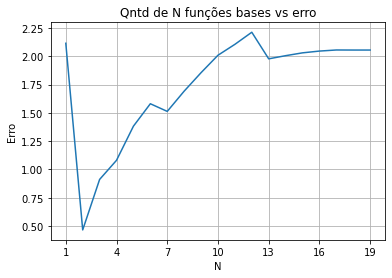

In [40]:
regress_errs_quad = []
ns = np.arange(1,20)
errs = []
for n in ns:
    errs.append(regress_err_quad(func,fs,xs,ys,n,a,b))

plt.plot(ns,errs)
plt.xticks(np.arange(1,20,3))
plt.grid()
plt.xlabel("N")
plt.ylabel("Erro")
plt.title("Qntd de N funções bases vs erro")
ax = plt.gca()

O que você percebe?

Percebe-se que a mior diferença está entre os "Ns" 1 e 2. Para N = 2 esse valor chega a um mínimo, ao passo que aumentando a quantidade de bases, esse erro aumenta. Isso pode ser um possível indicativo de overfitting, quando a função passa exatamente pelos pontos utilizados pela regressão ao custo de ter um erro maior nas bordas.